<a href="https://colab.research.google.com/github/Azbqqq/azbqqq/blob/main/image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import numpy as np



In [4]:
(X_train, y_train) ,(X_test, y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
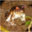

In [8]:
X_train[0]

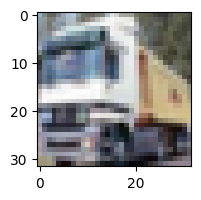

In [13]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])


In [14]:
y_train=y_train.reshape(-1,)
#y_test=y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
classes= ["airplane","automobile", "bird", "cat", "deer","dog","frog","horse","ship","truck"]

In [17]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

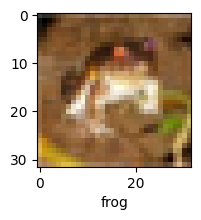

In [21]:
plot_sample(X_train,y_train,0)

In [22]:
X_train= X_train/255
X_test= X_test/255

In [27]:
cnn= models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')

])

In [29]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])


In [30]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4168 - loss: 1.6165
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5818 - loss: 1.1809
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6311 - loss: 1.0598
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.6598 - loss: 0.9772
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.6877 - loss: 0.8934
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7104 - loss: 0.8246
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7387 - loss: 0.7651
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7514 - loss: 0.7161
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.7703 - loss: 0.6589
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7847 - loss: 0.6180


In [32]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6490 - loss: 1.1024


[1.138047695159912, 0.6388000249862671]

In [34]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [36]:
y_

NameError: name 'y_' is not defined

In [39]:
y_pred=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [40]:
y_pred[:5]

array([[7.2014227e-04, 1.2322996e-05, 2.8074479e-03, 9.2980415e-01,
        1.3633998e-04, 2.0543166e-02, 2.8345904e-03, 7.3899413e-05,
        4.3030355e-02, 3.7556303e-05],
       [6.0247321e-04, 3.2838786e-03, 3.9849760e-07, 4.2521819e-08,
        1.0598496e-08, 1.2666691e-10, 6.4542045e-11, 2.0340769e-11,
        9.9611175e-01, 1.4635540e-06],
       [7.0240110e-01, 7.8728795e-03, 1.3500577e-02, 3.0512873e-03,
        2.7129563e-04, 3.6426325e-05, 9.4353578e-05, 1.3754680e-03,
        2.6850384e-01, 2.8926544e-03],
       [4.0650818e-01, 2.2076438e-03, 3.7407085e-02, 3.3972171e-04,
        4.7068088e-03, 7.4352779e-06, 2.7322863e-05, 7.0297242e-06,
        5.4877007e-01, 1.8702396e-05],
       [6.5027893e-07, 1.3562688e-04, 1.6202575e-02, 1.9134138e-02,
        1.5095063e-01, 1.4474933e-03, 8.1206703e-01, 4.7545195e-06,
        5.4020933e-05, 3.0589879e-06]], dtype=float32)

In [41]:
y_classes=[np.argmax(element) for element in y_pred]

y_classes[:5]

[np.int64(3), np.int64(8), np.int64(0), np.int64(8), np.int64(6)]

In [42]:
classes[y_classes[0]]

'cat'